In [1]:
from typing import List, Dict, Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import missingno as mns
import os
import warnings


os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../models/image/image1"
DATA_PATH = '../data/data/'
RESULT_PATH = '../data/summary/'
MODEL_PATH = '../models/model1/'

In [2]:
figure_count = 0

def create_figure(figure_name, dpi=800):
    global figure_count
    figure_count += 1
    plt.savefig(PIC_PATH + f'/figure{figure_count}_{figure_name}.png', dpi=dpi)

In [3]:
import pickle

def read_bins(path: str, res=True) -> Any:
    if res:
        f = open(RESULT_PATH + path, 'rb')
    else:
        f = open(path, 'rb')
    s = f.read()
    return pickle.loads(s)

def write_bins(model: Any, path: str, res=True) -> Any:
    path = RESULT_PATH + path if res else path
    m = pickle.dumps(model)
    with open(path, 'wb+') as f:
        f.write(m)

In [4]:
earth: List = read_bins('earth.list')
shed: pd.DataFrame = read_bins('unnatural.list')[0]
data = pd.read_csv(RESULT_PATH + 'all.csv', index_col=0)
data

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
0,0.031847,0.001247,-0.018077,-0.015064,-0.004527,0.001362,0.001121,-0.060829,-0.113750,-0.137995,...,11.053165,-5.428255,-3.481101,-11.606074,14.613235,-56.581930,-19.432630,-33.967102,16.815691,23.275390
1,-0.011189,-0.007641,-0.000769,-0.014596,0.024943,-0.020155,-0.011509,-0.071120,-0.162867,-0.102444,...,15.089084,-4.420704,-0.793958,-10.087299,17.036705,-55.657642,-28.327196,-32.017540,10.192864,5.198435
2,-0.019609,-0.002028,0.005312,0.003179,0.007167,0.009315,-0.008702,-0.036972,-0.154447,-0.095895,...,17.843573,-2.655398,2.013185,-9.089544,19.010990,-53.212746,-35.569153,-27.452972,5.472429,-12.615696
3,0.019685,-0.028223,-0.000301,0.006454,-0.011077,0.004637,0.018897,0.016355,-0.090361,-0.101508,...,19.054186,-0.385398,4.666858,-8.460361,20.438337,-49.525192,-40.711327,-20.603409,2.710255,-28.700695
4,-0.020076,-0.024481,-0.010124,-0.011789,-0.013415,-0.002380,-0.010573,0.074827,-0.041245,-0.050053,...,18.593573,2.107255,6.870124,-7.919340,21.253235,-44.935604,-43.475456,-12.023408,1.658299,-41.896564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,-0.176508,0.106352,0.074749,0.000618,0.016799,0.000186,0.094473,0.033132,-0.124896,...,-9.548468,36.734196,-14.756203,58.555965,14.489765,-25.795603,-49.127632,38.119200,4.280690,17.495827
7996,-3.392283,-0.133005,0.097932,0.125737,-0.023706,0.002765,0.002993,0.085118,0.030325,-0.136592,...,-8.434589,43.017868,-9.988856,52.443720,17.156092,-29.644175,-73.555240,32.112026,16.642647,9.981479
7997,-2.868840,-0.115230,0.050687,0.150997,-0.017625,0.026155,0.024043,0.046760,0.019098,-0.124429,...,-7.400916,48.391540,-4.615999,46.517190,19.705276,-31.971317,-95.766106,27.962679,27.897211,2.834087
7998,-2.935732,-0.082953,0.002506,0.178128,-0.021835,0.004637,0.024043,0.020097,0.038745,-0.147818,...,-6.257651,52.505825,1.435226,40.839844,22.088541,-32.558460,-113.732630,25.867680,37.658300,-3.782435


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(data)
transform = pd.DataFrame(columns=data.columns, data=ss.transform(data))

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def SNR(SN, S):
    SN = SN.to_numpy()
    S = S.to_numpy()
    Ps = np.sum((S - (np.mean(S))) ** 2)
    Pn = np.sum((S - SN) ** 2)
    snr = 10 * np.log10((Ps/Pn))
    return snr

def metrics(y_true, y_pred):
    return [
        mean_squared_error(y_true, y_pred),
        mean_absolute_error(y_true, y_pred),
        r2_score(y_true, y_pred),
        SNR(y_true, y_pred)
    ]

In [7]:
roll = transform.rolling(window=7, ).mean().dropna().round(2)

In [8]:
metrics(transform[6:], roll)

[0.31768942034715464,
 0.28155153297684066,
 0.6825359378444578,
 4.183632347042347]

In [9]:
from keras.layers import Conv1D, Conv1DTranspose, Dense, BatchNormalization, AvgPool1D, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(512, 9, input_shape=(1, 8000), activation='relu', strides=1, padding='same'))
model.add(Dropout(.6))
model.add(Conv1D(256, 9, strides=1, activation='relu', padding='same'))
model.add(Dropout(.6))
model.add(Conv1D(128, 9, strides=1, activation='relu', padding='same'))
model.add(Dropout(.6))
model.add(BatchNormalization())
model.add(AvgPool1D(padding='same'))
model.add(Conv1DTranspose(128, 9, strides=1, activation='relu', padding='same'))
model.add(Dropout(.6))
model.add(Conv1DTranspose(256, 9, strides=1, activation='relu', padding='same'))
model.add(Dropout(.6))
model.add(Conv1DTranspose(512, 9, strides=1, activation='relu', padding='same'))
model.add(Dropout(.6))
model.add(Dense(8000))

model.compile(loss='mse', metrics=['mae'])

In [10]:
model.fit(transform.T.to_numpy().reshape(-1, 1, 8000), transform.T, epochs=32)

Epoch 1/32
6/6 [==============================] - 14s 2s/step - loss: 1.0001 - mae: 0.5387
Epoch 2/32
6/6 [==============================] - 12s 2s/step - loss: 1.0000 - mae: 0.5390
Epoch 3/32
6/6 [==============================] - 12s 2s/step - loss: 1.0000 - mae: 0.5420
Epoch 4/32
6/6 [==============================] - 13s 2s/step - loss: 0.9999 - mae: 0.5369
Epoch 5/32
6/6 [==============================] - 12s 2s/step - loss: 0.9998 - mae: 0.5376
Epoch 6/32
6/6 [==============================] - 12s 2s/step - loss: 0.9998 - mae: 0.5379
Epoch 7/32
6/6 [==============================] - 12s 2s/step - loss: 0.9997 - mae: 0.5389
Epoch 8/32
6/6 [==============================] - 12s 2s/step - loss: 0.9997 - mae: 0.5399
Epoch 9/32
6/6 [==============================] - 12s 2s/step - loss: 0.9996 - mae: 0.5377
Epoch 10/32
6/6 [==============================] - 12s 2s/step - loss: 0.9995 - mae: 0.5400
Epoch 11/32
6/6 [==============================] - 12s 2s/step - loss: 0.9995 - mae: 0.54

In [11]:
model.evaluate(transform.T.to_numpy().reshape(-1, 1, 8000), transform.T)

6/6 [==============================] - 1s 64ms/step - loss: 0.9983 - mae: 0.5456


[0.9983430504798889, 0.5455804467201233]

In [12]:
from pyts.decomposition import SingularSpectrumAnalysis

window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
x_ssa = ssa.fit_transform(transform)
x_ssa

array([[[-2.62835778e-01, -4.57386239e-01, -6.18895620e-01, ...,
         -3.76205567e-03, -1.92178558e-03,  1.09059277e-02],
        [ 5.42982191e-01,  5.11140710e-01,  2.55645479e-01, ...,
         -6.09774450e-03, -3.58343801e-03,  6.13867850e-03],
        [-2.67543931e-01, -4.23040466e-02,  1.87047055e-01, ...,
         -8.64479347e-03,  1.42693966e-02, -7.68589957e-04]],

       [[-1.58540268e-01, -2.48089243e-01, -4.81647168e-01, ...,
         -2.53087528e-03, -1.05427906e-03,  4.51176875e-03],
        [ 9.45124948e-02,  2.69565894e-01,  5.08666392e-01, ...,
         -1.14270209e-02,  6.09185793e-03, -1.10447436e-03],
        [ 6.06917026e-02, -3.77168357e-02, -5.13009728e-02, ...,
         -3.34417540e-03, -6.26374628e-05,  2.67290633e-03]],

       [[-6.40953423e-02,  2.62367475e-02, -2.52269647e-01, ...,
         -2.97456926e-03,  4.74921973e-04,  4.70708705e-03],
        [-4.57365468e-02, -2.89237151e-02,  3.33974896e-01, ...,
         -1.15435292e-02,  9.71267988e-03, -6.004

In [13]:
metrics(transform, pd.DataFrame(x_ssa.sum(axis=1)))

[3.646610687723345e-31, 3.3209946377612994e-16, 1.0, 304.3811059950455]

In [14]:
import pywt

w = pywt.Wavelet('db3')
maxlev = pywt.dwt_max_level(8000, w.dec_len)
lst = []
threshold = 1e-1
for i in transform.columns:
    coeffs = pywt.wavedec(transform[i], 'db3', level=maxlev)
    for j in range(1, len(coeffs)):
        coeffs[j] = pywt.threshold(coeffs[j], threshold*max(coeffs[j]))
    lst.append(pywt.waverec(coeffs, 'db3'))

In [15]:
array = np.array(lst)
array

array([[ 0.00091359,  0.0009125 ,  0.00091142, ..., -0.6813033 ,
        -0.77964799, -0.87514464],
       [-0.01303774, -0.01854392,  0.0025773 , ..., -0.2632144 ,
        -0.26003758, -0.26759581],
       [-0.05841308, -0.05843736, -0.05846157, ...,  0.07491851,
        -0.03696257, -0.18078236],
       ...,
       [ 0.0012839 ,  0.00132291,  0.00136205, ...,  0.01903331,
         0.01906036,  0.01908733],
       [ 0.0107937 ,  0.01082106,  0.01084858, ...,  0.0116123 ,
         0.01161059,  0.01160883],
       [ 0.01381097,  0.01388495,  0.01377188, ...,  0.00592478,
         0.00591943,  0.00591409]])

In [16]:
metrics(pd.DataFrame(array).T, transform)

[0.08984023345699559,
 0.1963309389486759,
 0.8524587784889113,
 10.465291281963625]

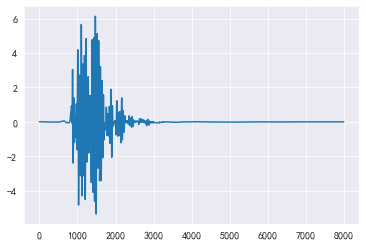

In [17]:
plt.plot(array[-1])

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
0,4.796276e-06,7.551748e-05,2.290025e-05,6.495475e-05,1.800603e-05,3.236246e-06,2.509957e-05,8.655257e-05,1.653017e-05,1.857385e-05,...,5.933743e+03,9.437184e+03,6.386990e+04,7.521693e+03,7.398994e+03,3.152258e+03,4.397148e+03,4.728693e+03,2.745104e+03,1.112152e+04
1,5.497657e-06,7.101913e-04,3.960055e-05,6.281387e-04,3.443828e-04,3.670596e-05,2.592757e-04,1.585093e-04,1.939732e-05,2.551695e-04,...,5.762508e+04,7.467174e+04,3.947840e+05,3.210065e+04,5.384598e+04,2.651267e+04,2.971132e+04,3.271628e+04,3.115079e+04,2.094819e+04
2,4.556032e-05,2.714144e-03,1.409559e-04,2.224410e-03,1.426693e-03,2.006227e-04,9.094173e-04,7.623777e-04,7.917780e-05,3.325443e-03,...,2.269646e+05,2.640242e+05,1.109684e+06,6.478384e+04,9.995002e+04,5.543168e+04,6.270119e+04,9.087477e+04,6.486759e+04,4.560257e+04
3,2.237767e-04,4.326447e-03,2.954963e-04,3.499195e-03,2.784674e-03,4.504541e-04,2.807041e-03,3.259194e-03,1.945744e-04,8.524526e-03,...,7.663660e+05,7.926020e+05,1.842402e+06,1.035623e+05,1.251273e+05,4.190017e+04,6.006544e+04,1.062822e+05,7.341107e+04,6.081311e+04
4,1.007550e-03,3.372319e-03,3.370104e-04,2.798737e-03,2.891026e-03,7.087899e-04,4.992996e-03,3.664146e-03,3.794974e-04,1.398198e-02,...,4.083353e+06,4.286561e+06,5.806088e+06,6.054142e+05,3.103821e+05,2.883509e+04,2.569193e+05,4.746132e+05,2.730264e+05,9.908469e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.848255e-10,1.842007e-10,2.037401e-10,2.005932e-10,3.134958e-10,1.662766e-10,1.463207e-10,1.567519e-10,2.284999e-10,2.221690e-10,...,1.799403e-08,1.053100e-08,4.408827e-09,8.276120e-09,3.906553e-09,5.412287e-10,8.409046e-09,1.192435e-08,8.749341e-09,2.891343e-09
125,2.205837e-10,1.847209e-10,1.689545e-10,1.786045e-10,2.126210e-10,1.337718e-10,2.087304e-10,1.555342e-10,1.626347e-10,1.950114e-10,...,1.466496e-08,9.163645e-09,4.099671e-09,6.041603e-09,1.965282e-09,4.818286e-10,6.048160e-09,1.051439e-08,8.439040e-09,2.374534e-09
126,1.464200e-10,2.088439e-10,1.688025e-10,1.411746e-10,1.505500e-10,1.525603e-10,1.705795e-10,1.967143e-10,1.385673e-10,1.767240e-10,...,1.203826e-08,1.012337e-08,3.865219e-09,5.486862e-09,1.310618e-09,3.462392e-10,5.327009e-09,1.059070e-08,6.619878e-09,1.995901e-09
127,1.270069e-10,1.681743e-10,1.924910e-10,1.422262e-10,1.606664e-10,1.906216e-10,1.500516e-10,1.916653e-10,1.612873e-10,1.952322e-10,...,1.145685e-08,6.316224e-09,3.760315e-09,4.163981e-09,8.122716e-10,4.042366e-10,4.998239e-09,1.006416e-08,8.679896e-09,1.537883e-09


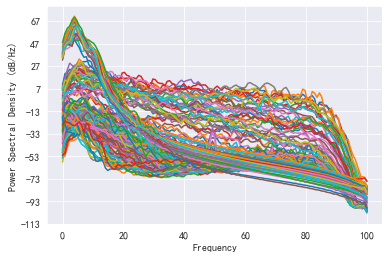

In [18]:
array = pd.DataFrame(array).T
psd = pd.DataFrame()

for i in data.columns:
    psd[i] = plt.psd(data[i], return_line=False, Fs=200)[0]
psd

In [ ]:
psd = 10 * np.log10(psd)

In [39]:
norm = psd.T.iloc[:-30]
act = psd.T.iloc[-30:]

norm

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
1_1,-53.190958,-52.598224,-43.414133,-36.501852,-29.967333,-23.084995,-18.495200,-16.962290,-10.273499,-5.732586,...,-63.470723,-68.662706,-75.689211,-81.635236,-88.084229,-94.147362,-96.564266,-98.343996,-98.961728,-102.350136
1_10,-41.219525,-31.486247,-25.663672,-23.638686,-24.720714,-24.201461,-22.134034,-21.206743,-19.845220,-19.722589,...,-80.565650,-87.736206,-93.010831,-96.924964,-97.347543,-97.347087,-97.334839,-96.801782,-97.742404,-100.200983
1_11,-46.401599,-44.022988,-38.509167,-35.294480,-34.723567,-36.216403,-33.651644,-31.888322,-31.647134,-28.896292,...,-84.325815,-89.522735,-93.517953,-95.640700,-95.904359,-96.909234,-97.722303,-97.726210,-97.155896,-100.036789
1_12,-41.873891,-32.019444,-26.527852,-24.560318,-25.530379,-24.358204,-20.593724,-19.560215,-19.319126,-17.819953,...,-79.048278,-87.258922,-92.769265,-95.821071,-96.588656,-96.976838,-97.481076,-98.502434,-98.470204,-101.021811
1_13,-47.445819,-34.629585,-28.456695,-25.552256,-25.389481,-25.323656,-21.940158,-23.400505,-24.213389,-25.511168,...,-85.998662,-91.302354,-93.990626,-96.675173,-95.302028,-95.037683,-96.723939,-98.223191,-97.940750,-101.200631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_5,-5.177496,1.647841,6.300485,8.465485,6.730106,10.289603,7.096600,9.441010,11.991642,12.821342,...,-69.213098,-73.195319,-76.795629,-78.877062,-79.274815,-78.928922,-79.275148,-79.681700,-79.591608,-81.960656
7_6,-2.861363,1.372656,2.727875,3.241874,3.539186,5.402338,4.059877,3.111265,5.766854,7.121129,...,-73.533659,-75.118036,-76.855303,-81.196646,-80.664608,-79.210371,-79.347249,-79.484703,-79.712709,-83.350404
7_7,-7.246588,3.833219,8.778330,15.078363,19.434451,17.377512,18.512785,13.784663,9.853655,13.335725,...,-78.363643,-78.805318,-79.271038,-78.942606,-78.481567,-78.016765,-78.802100,-78.697910,-78.881068,-80.653814
7_8,-4.081870,6.562309,11.987969,16.963836,20.276618,20.943721,16.733278,13.646882,12.316980,12.364947,...,-77.143368,-78.108474,-78.002411,-78.788209,-79.473452,-79.686360,-78.476636,-78.054855,-78.931600,-82.696499


In [50]:
def return_time_features(multi_series: pd.DataFrame) -> pd.DataFrame:
    """
    四分位数，标注查，平均值，最大值，最小值，方差，极差，整流平均值，偏度，峰度，均方根，波形因子，峰值因子，脉冲因子，裕度因子
    :param multi_series: 多个序列信号
    :return: 信号的时序指标
    """
    describe = multi_series.describe().mean(axis=1).T
    describe['var'] = multi_series.var(axis=0).mean()
    describe['range'] = (describe['max'] - describe['min']).mean()
    describe['f_avg'] = multi_series.abs().mean(axis=0).mean()
    describe['skew'] = multi_series.skew(axis=0).mean()
    describe['kurt'] = multi_series.kurt(axis=0).mean()
    describe['rms'] = (multi_series ** 2).sum(0).pow(1/2).mean()
    describe['s'] = describe.rms / describe.f_avg
    describe['c'] = describe.range / describe.rms
    describe['impulse'] =  describe.range / describe.f_avg
    xr = np.sqrt(multi_series.abs(), ).mean() ** 2
    describe['l'] = (describe.range / xr).mean()
    return describe.T


def describe_all(lst: List) -> pd.DataFrame:
    count = 1
    describe = pd.DataFrame()
    for i in lst:
        describe[f'event_{count}'] = return_time_features(i)
        count += 1
    return describe

In [51]:
describe_all(earth + [shed])

,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,0.000684,-0.000090,-0.001787,-0.003866,0.010082,-0.000903,-0.038662,-1.050766e+00
std,0.601421,0.410610,0.736504,4.349033,46.276814,0.564522,7.823937,2.012790e+03
min,-5.021050,-2.453572,-4.483377,-34.719519,-367.754957,-2.481310,-51.828470,-1.393731e+04
25%,-0.073078,-0.146377,-0.184054,-0.122967,-0.579313,-0.233566,-0.467928,-9.669491e+01
50%,-0.000339,-0.000115,-0.000878,-0.003573,0.000817,-0.003102,-0.043167,1.896258e+00
75%,0.072898,0.144147,0.175936,0.111103,0.670575,0.234161,0.396681,9.263734e+01
max,4.909112,2.455236,4.390404,32.068356,366.920626,2.448496,50.647486,1.633764e+04
var,0.773972,0.197857,0.728334,65.130692,2410.364014,0.338586,129.089188,4.885393e+06
range,9.930163,4.908808,8.873782,66.787875,734.675583,4.929806,102.475956,3.027494e+04


In [53]:
psd.to_csv(RESULT_PATH + 'psd.csv', index=None)

In [54]:
write_bins(ss, 'ss.model')
transform.to_csv(RESULT_PATH + 'transform.csv', index=None)